In [7]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

#stylin
plt.style.use('seaborn-darkgrid')

#import the data
pd.read_excel('river_13C_data(4).xlsx')
data1=pd.read_excel('river_13C_data(4).xlsx')


/Users/oliviawren/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [35]:
subset=pd.DataFrame({'geo_class':['river','river plume','river mouth','tributary','catchment','watershed','reservoir']})
data=subset.merge(data1,on='geo_class')


In [36]:
#convert all units to µM/L
tmp_data=[]
for i,d in data.iterrows():
    #uM/L --> mM/L
    if d['DIC_units']=='µM/L':
        tmp_data.append(d['DIC'])
    #mM/L --> mM/L
    elif d['DIC_units']=='mM/L':
        tmp_data.append(d['DIC']*1000)
    #mM/Kg --> mM/L
    elif d['DIC_units']=='mM/kg':
        tmp_data.append(d['DIC']*1000)
    #uM/kg --> mM/L
    elif d['DIC_units']=='µM/kg':
        tmp_data.append(d['DIC']) 
    #mg C/L --> mM/L
    elif d['DIC_units']=='mg C/L':
        tmp_data.append((d['DIC']/12.011)*1000)
    else:
        tmp_data.append(np.nan)
        
tmp_data=np.array(tmp_data)
data['DIC_trans']=tmp_data.astype(float)

In [37]:
HCO3_data=[]
for i,d in data.iterrows():
    if d['HCO3_units']=='µM/L':
        HCO3_data.append(d['HCO3'])
    elif d['HCO3_units']=='mM/L':
        HCO3_data.append(d['HCO3']*1000)
    elif d['HCO3_units']=='mg/L':
        HCO3_data.append(d['HCO3']/61.0168)
    else:
        HCO3_data.append(np.nan)
HCO3_data=np.array(HCO3_data)
data['HCO3_trans']=HCO3_data.astype(float)

In [38]:
set(data['Alk_units'])
#is CaCO3 alkalinity not the same as total alkalinity? I feel like this is related to CA not TA
#pull paper this data comes from...

{'CaCO3 mg/L',
 'g C/m^3',
 'mM/L',
 'mM/kg',
 'meq/L',
 'mg CaCO3 / L',
 nan,
 'µM/L',
 'µM/kg',
 'µeq/L'}

In [39]:
Alk_data=[]
for i,d in data.iterrows():
    if d['Alk_units']=='mM/L':
        Alk_data.append(d['Alk']*1000)
    elif d['Alk_units']=='mM/kg':
        Alk_data.append(d['Alk']*1000)
    elif d['Alk_units']=='meq/L':
        Alk_data.append(d['Alk']*1000)
    elif d['Alk_units']=='µM/L':
        Alk_data.append(d['Alk'])
    elif d['Alk_units']=='M/kg':
        Alk_data.append(d['Alk'])
    elif d['Alk_units']=='µeq/L':
        Alk_data.append(d['Alk'])
    else:
        Alk_data.append(np.nan)
        
Alk_data=np.array(Alk_data)
data['Alk_trans']=Alk_data.astype(float)


In [40]:
#converting pCO2 units to uatm
pCO2_data=[]
for i,d in data.iterrows():
    if d['CO2_units']=='µatm':
        pCO2_data.append(d['CO2'])
    elif d['CO2_units']=='log(pCO2)':
        pCO2_data.append((10**(d['CO2']))*1000)
    elif d['CO2_units']=='log(pCO2)(mbar)':
        pCO2_data.append(((10**(d['CO2']))*0.000986923)*1000)
    elif d['CO2_units']=='mbar':
        pCO2_data.append((d['CO2']*0.000986923)*1000)
    elif d['CO2_units']=='Pa':
        pCO2_data.append((d['CO2']*9.8692300004935e-6)*1000)
    else:
        pCO2_data.append(np.nan)
        
pCO2_data=np.array(pCO2_data)
data['pCO2_trans']=pCO2_data.astype(float)

In [41]:
#converting CO2(aq) to umol/kg
CO2_aq_data=[]
for i,d in data.iterrows():
    if d['CO2_units']=='ppmv':
        CO2_aq_data.append(d['CO2']*1000)
    elif d['CO2_units']=='µM/L':
        CO2_aq_data.append(d['CO2'])
    else:
        CO2_aq_data.append(np.nan)
CO2_aq_data=np.array(CO2_aq_data)
data['CO2_aq_trans']=CO2_aq_data.astype(float)

In [42]:
#also ppm data...
CO2_ppm_data=[]
for i,d in data.iterrows():
    if d['CO2_units']=='ppm':
        CO2_ppm_data.append(d['CO2'])
    else:
        CO2_ppm_data.append(np.nan)
        
CO2_ppm_data=np.array(CO2_ppm_data)
data['CO2_ppm_trans']=CO2_ppm_data.astype(float)

In [43]:
to_export=pd.DataFrame(data)

to_export.to_excel('rivers_only_updated_units.xlsx')

In [44]:
import numpy as np
import pandas as pd
import xarray
from matplotlib import pyplot as plt

In [45]:
# define input conditions; DIC and Alk
kwargs = dict(
    par1 = data['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_trans'],
    par2_type = 2 #DIC
)
print("Conditions have been defined!")

Conditions have been defined!


In [46]:
# Import PyCO2SYS
import PyCO2SYS as pyco2

# Run PyCO2SYS
results = pyco2.sys(**kwargs)

# Extract and print out the result
pH = results['pH']
pH_data=np.array(pH)
#save ph_predicted as its own column
data['ph_pred']=pH_data.astype(float)

In [52]:
#calculate d13C_pred

T=25    #degree C
S=35    #PSS
TK = T + 273.15 
DIC=np.array(data['DIC_trans'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-data['ph_pred'])

#DIC concentrations calculated from pH
HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
#set d13C for DIC components
CO2aq=-9
CO3=-2
HCO3=0

#calculate d13C_DIC from DIC component concentrations

d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
data['d13C_DIC_pred']=d13C_DIC_pred.astype(float)


In [53]:
#calculate residual (d13C_measured - d13C_predicted)

r = np.array(data['d13C_DIC'].astype(float)) - np.array(data['d13C_DIC_pred'])

print(np.sum(~np.isnan(r)))
# print(data['d13C_DIC'].dtypes)

395


395.0

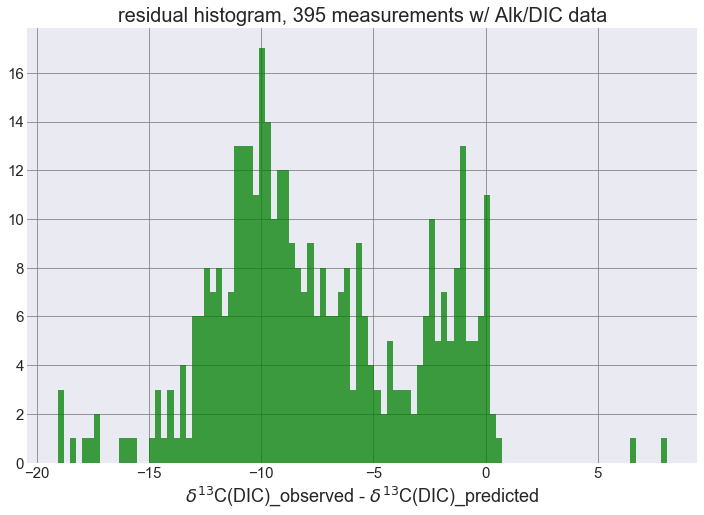

In [54]:
#plot residual histogram

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
n,bins,patches = plt.hist(r,100,facecolor='g',alpha=0.75)
# plt.hist(r,bins=100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC)_observed - $\delta^{13}$C(DIC)_predicted',fontsize=18)
plt.title('residual histogram, 395 measurements w/ Alk/DIC data', fontsize=20)
plt.grid(color='grey')
len(data['pH'])
np.sum(n)

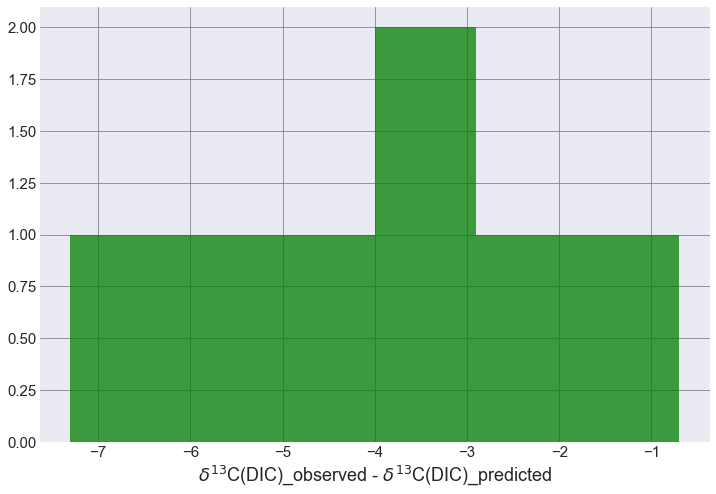

In [16]:
#Jody's paper only fraser data
#observed:
data=pd.read_excel('jody data.xlsx')
r=data['obs_F']-data['calc_F']
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
n,bins,patches = plt.hist(r,6,facecolor='g',alpha=0.75)
# plt.hist(r,bins=100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC)_observed - $\delta^{13}$C(DIC)_predicted',fontsize=18)
# plt.title('residual histogram, 395 measurements w/ Alk/DIC data', fontsize=20)
plt.grid(color='grey')

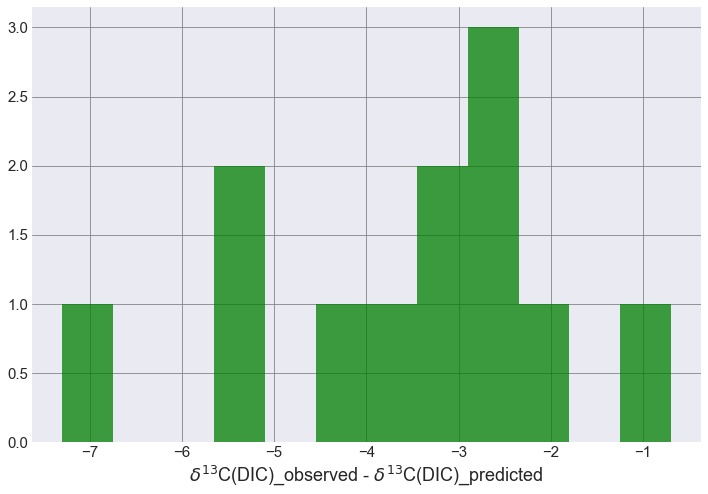

In [14]:
#Jody's paper
#observed:
data=pd.read_excel('jody data.xlsx')
r=data['obs']-data['calc']
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
n,bins,patches = plt.hist(r,12,facecolor='g',alpha=0.75)
# plt.hist(r,bins=100)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('$\delta^{13}$C(DIC)_observed - $\delta^{13}$C(DIC)_predicted',fontsize=18)
# plt.title('residual histogram, 395 measurements w/ Alk/DIC data', fontsize=20)
plt.grid(color='grey')


373.0


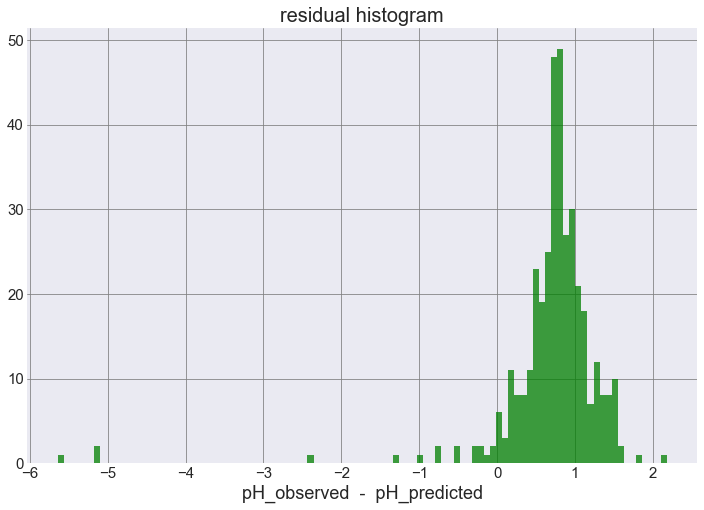

In [55]:
#residual for ph_pred
r_ph = data['pH'] - data['ph_pred']

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
n,bins,patches = plt.hist(r_ph,100,facecolor='g',alpha=0.75)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylabel('',fontsize=18)
plt.xlabel('pH_observed  -  pH_predicted',fontsize=18)
plt.title('residual histogram', fontsize=20)
plt.grid(color='grey')
print(np.sum(n))

In [29]:
# what about data where I dont have DIC and Alk, but I do have DIC and HCO3 or Alk and HCO3?
#possible combos:
    #DIC/Alk
    #DIC/HCO3
    #DIC/CO2
    #Alk/HCO3
    #ALK/CO2

data_dict = {'DIC_trans':1,
             'Alk_trans':2,
             'HCO3_trans':6,
             'pCO2_trans':4}

param_pairs = [('DIC_trans','DIC_trans'),
               ('Alk_trans','HCO3_trans')]
param_pairs_2 = [('DIC_trans','Alk_trans'),
               ('pCO2_trans','HCO3_trans')]
param_pairs_3 = [('Alk_trans','HCO3_trans'),
                ('pCO2_trans','pCO2_trans')]
for p in param_pairs:
    print('param pair 1 = ', p[0])
print(' ')
for p in param_pairs:    
    print('param pair 2 = ', p[1])
print('')
for p in param_pairs_2:
    print('param pair 3 = ', p[0])
print(' ')
for p in param_pairs_2:    
    print('param pair 4 = ', p[1])
print('')
for p in param_pairs_3:
    print('param pair 5 = ', p[0])
print(' ')
for p in param_pairs:    
    print('param pair 6 = ', p[1])
print('')

param pair 1 =  DIC_trans
param pair 1 =  Alk_trans
 
param pair 2 =  DIC_trans
param pair 2 =  HCO3_trans

param pair 3 =  DIC_trans
param pair 3 =  pCO2_trans
 
param pair 4 =  Alk_trans
param pair 4 =  HCO3_trans

param pair 5 =  Alk_trans
param pair 5 =  pCO2_trans
 
param pair 6 =  DIC_trans
param pair 6 =  HCO3_trans



In [18]:
import numpy as np
col_names1=['Alk_transformed','DIC_trans','CO2','CO2_trans','HCO3']
col_names2=['DIC_trans','CO2','CO2_trans','HCO3','Alk_transformed']
col_dict={'Alk_transformed':1,
          'DIC_trans':2,
          'CO2':3,
          'CO2_trans':3,
          'HCO3':4}
for i,c in enumerate(col_names1):
    param1 = col_dict[col_names1[i]]
    param2 = col_dict[col_names2[i]]
    
    print('my paramater one is %s ' %(param1))
    print('my paramater two is %s \n' %(param2))
#%%
    
param_pairs = [('Alk_transformed','DIC_trans'),
               ('CO2','HCO3')]
for p in param_pairs:
    print(p[0])
    print(p[1])
    
    
    
#    print(p)
    param1 = col_dict[p[0]]
    param2 = col_dict[p[1]]
#    
    print('my paramater one is %s ' %(param1))
    print('my paramater two is %s \n' %(param2))
#%%
    
a = np.array([[1,2,3],
              [1,np.nan,3],
              [np.nan,2,3]])
    
idx = (~np.isnan(a[:,0])) & (~np.isnan(a[:,1]))
print(a[idx,:])

my paramater one is 1 
my paramater two is 2 

my paramater one is 2 
my paramater two is 3 

my paramater one is 3 
my paramater two is 3 

my paramater one is 3 
my paramater two is 4 

my paramater one is 4 
my paramater two is 1 

Alk_transformed
DIC_trans
my paramater one is 1 
my paramater two is 2 

CO2
HCO3
my paramater one is 3 
my paramater two is 4 

[[1. 2. 3.]]
